In [65]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

In [74]:
uploaded = files.upload()
data_set = pd.read_csv("StudentPerformanceFactors.csv")

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (6).csv


In [75]:
x = data_set[['Hours_Studied']]
y= data_set[['Exam_Score']]

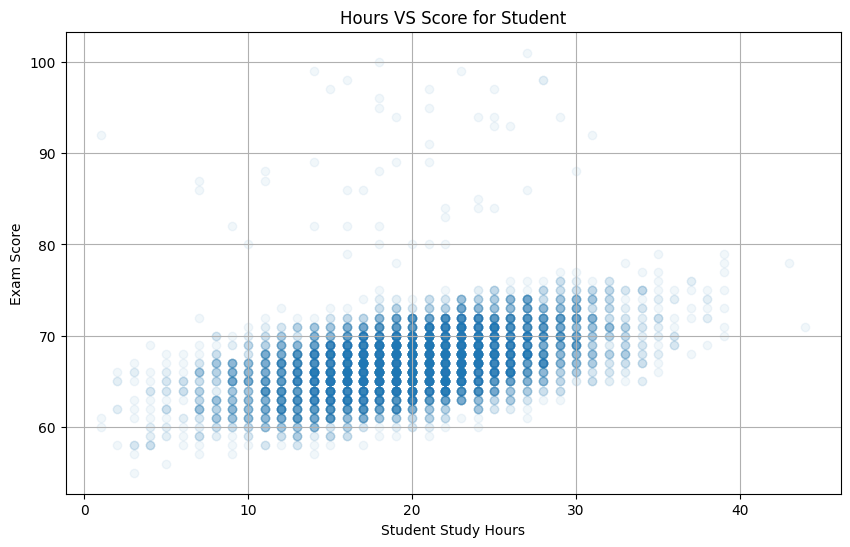

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,alpha=.06)
plt.title("Hours VS Score for Student")
plt.xlabel("Student Study Hours")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

In [77]:
data_set = data_set.dropna(subset=['Hours_Studied', 'Exam_Score'])
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = 0.3, random_state= 42)

In [78]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_model.predict(x_test)

array([[67.24903476],
       [67.8201129 ],
       [67.53457383],
       ...,
       [69.5333473 ],
       [70.38996451],
       [67.24903476]])

In [79]:
linear_prediction = linear_model.predict(x_test)
linear_mae = mean_absolute_error(y_test, linear_prediction)
linear_rmse= np.sqrt(mean_squared_error(y_test, linear_prediction))
linear_r2 = r2_score(y_test, linear_prediction)


In [80]:
poly_data = PolynomialFeatures(degree=2)
x_poly_train = poly_data.fit_transform(x_train)
x_poly_test = poly_data.fit_transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)
poly_model.predict(x_poly_test)
poly_prediction = poly_model.predict(x_poly_test)

poly_mae = mean_absolute_error(y_test, poly_prediction)
poly_rmse= np.sqrt(mean_squared_error(y_test, poly_prediction))
poly_r2 = r2_score(y_test, poly_prediction)

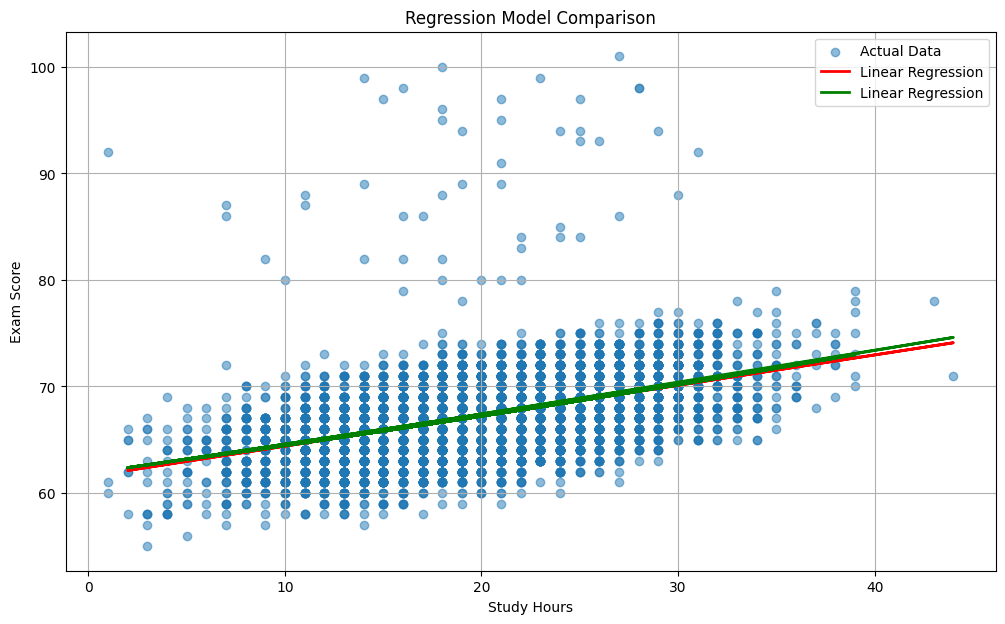

In [81]:
plt.figure(figsize=(12, 7))
plt.scatter(x, y, alpha=0.5, label='Actual Data')
plt.plot(x_test, linear_prediction, color='red', linewidth=2, label='Linear Regression')
plt.plot(x_test, poly_prediction, color='green', linewidth=2, label='Linear Regression')
plt.title('Regression Model Comparison')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'MAE': [linear_mae, poly_mae],
    'RMSE': [linear_rmse, poly_rmse],
    'R²': [linear_r2, poly_r2]
})
print(results)

                   Model       MAE      RMSE        R²
0      Linear Regression  2.436103  3.245896  0.233198
1  Polynomial Regression  2.434220  3.244148  0.234023
